# <font color='red'>Backtest vectorizado para una estrategia 'Regresion lineal' definida.</font>

### Hackeado by J3viton (learning BackTesting 2021).

---

En este notebook vamos a automatizar el backtesting para estrategias. Previamente tenemos que definir **la estrategia** usando el template (import estrategia_XX as rg), donde definimos la clase estrategia que contiene los metodos de analisis, entreda y salida de mercado. Este módulo se programa y adapta para cada estrategia. Luego en el metodo 'analisis' se crea un fichero excel con las metricas y rendimientos para evaluar la estrategia.

Vamos a usar el módulo Pandas, para realizar un backtest vectorizado, es decir calcular el resultado del backtest sin iterar sobre las filas (barras) de la serie temporal.

Posteriormente graficamos y mostramos los parametros generales que nos permiten analizar la estrategia.

#### J3Viton  2021

link a la base:

https://github.com/Python-para-Trading/Webinars-Docs/blob/master/Webinar%202/Webinar%202%20-%20Backtest%20con%20Pandas%20v%202.ipynb.

---

# DEFINICION DEL SISTEMA

Como es usual, importamos los módulos que vamos a necesitar para las distintas tareas, y preparamos Matplotlib para una mejor visualización de los gráficos en el notebook.

Se importa un modulo llamado analisis, en realidad se trata de un archivo .py con algunas funciones de apoyo para el trabajo, debe estar guardado en la misma carpeta que este notebook.
Se importa el módulo 'estrategia_XX', donde se define la estrategia de entreda y salida

Es importante tener clara la lógica del sistema, pues debemos plasmarla de forma sencilla y correcta en el dataframe para realizar el backtest del mismo.


In [38]:
import analisis
import regresionAMedia as rg  #cambiar segun el módulo con la estrategia implementado
import pandas as pd
import datetime as dt
from time import time
import yfinance as yf
import numpy as np

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 18, 8
plt.style.use('ggplot')

from IPython.display import display, Markdown

***0.- RECOGIDA DE DATOS INICIALES***
Introducimos el instrumento y las fechas


In [40]:
instrumento_ = 'vrtx'   # ticker del valor en yahooFinance

Fecha_Cominezo_Backtesting = dt.datetime(2015,1,2)
Fecha_Final_Backtesting    = dt.datetime(2021,11,18)
Fecha_Final_Backtesting    = dt.datetime.today()




***1.- Rango fechas a analizar***

Definimos el rango global de datos historicos que vamos a evaluar.
Definimos la ventana que vamos a ir desplazando por todo el espectro para ir analilazando como se comporta la estrategia. La funion 'analisis' nos vale para tiempo real y para backtesting, para back le pasamos la ventana como si la fecha de fin de la ventana fuera la fecha de hoy.
Tener en cuenta que la 'ventana' tiene uqe tener una anchura que nos permita hacer los calculos en rolling (ejemplo EMA 200)

In [41]:
# Rango completo para backTesting
#start2 =dt.datetime(2008,1,2)
start2= Fecha_Cominezo_Backtesting 
#end2   =dt.datetime(2021,11,18)
end2= Fecha_Final_Backtesting 
start_G= start2.strftime("%Y-%m-%d")
end_G  =   end2.strftime("%Y-%m-%d")
TOTAL_len= (end2-start2).days
print('Tamaño timeseries global a analizar:  ', TOTAL_len, 'sesiones')

#ventana de analisis 200 sesiones
startWindow2 = start2  #dt.datetime(2008,1,5)
endWindow2   =startWindow2 + dt.timedelta(days=500) #ventana grande para que se puedan hacer los calculos de EMA200
startWindow= startWindow2.strftime("%Y-%m-%d")
endWindow  =   endWindow2.strftime("%Y-%m-%d")
window_len= (endWindow2-startWindow2).days
print('Tamaño de la ventana a analizar paso a paso:  ', window_len, 'sesiones')

Tamaño timeseries global a analizar:   2779 sesiones
Tamaño de la ventana a analizar paso a paso:   500 sesiones


In [42]:
 #dff = pd.DataFrame(columns=('Close','Volume', 'Senal', 'Dif_Close', 'Retornos','Capital'))

***2.- Descargamos los datos para el marco Global***

In [43]:
instrumento = instrumento_  # 'rovi.mc'  #Vamos título a título. Mejora: Conjunto de títulos

In [44]:
dff = yf.download(instrumento, start_G,end_G)

[*********************100%***********************]  1 of 1 completed


In [8]:
dff.dropna(inplace=True)  
dff.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,119.970001,123.680000,118.300003,123.070000,123.070000,1434500
2015-01-05,122.269997,122.779999,119.339996,121.029999,121.029999,1681100
2015-01-06,121.309998,122.580002,116.800003,117.360001,117.360001,2289700
2015-01-07,118.820000,120.769997,117.629997,120.660004,120.660004,1219900
2015-01-08,122.000000,124.000000,121.139999,123.970001,123.970001,1358300


***3.- Creamos la clase strategy que tiene toda la lógica***

In [9]:
regreMedia= rg.StrategyClass(back=True)    #Creamos la clase

***4.- Recorremos el dataframe con valores buscando las señales de la estrategia***

In [10]:
dff.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-08-01', '2022-08-02', '2022-08-03',
               '2022-08-04', '2022-08-05'],
              dtype='datetime64[ns]', name='Date', length=1912, freq=None)

## Proceso de backTesting ##

En este 'for' vamos recorriendo la muestra del historico de datos (TOTAL), desplazando una sesión hacia el futuro 
en cada iteracion. Vamos pasando la movilola del pasado sesión a sesión por el análisis descrito en Strategy class.

Ouput:
El sistema registra los siguientes parámetros:

.-
.-
.-


In [11]:
startWindow

'2015-01-02'

In [12]:
tiempo_inicial = time()   # Tomamos tiempos para ver cuanto tarda en hacer la estrategia

In [13]:
dfe = pd.DataFrame({'A' : []})   #df empty

***En este 'for' desplazamos la ventana sesión a sesión a lo largo de todo el rango de fechas. Dejamos que las funciones de la clase estrategia hagan el trabajo de comprar//vender y anotar***


In [14]:
#Para pruebas
#TOTAL_len =1000

for i in range(TOTAL_len):
    endWindow3   =endWindow2 + dt.timedelta(days=i) 
    endWindow    =endWindow3.strftime("%Y-%m-%d")
    print ('end date:', endWindow)
    
    if(endWindow in dff.index):
        df_aux= dff.loc[startWindow:endWindow]       #voy pasando los datos desplazando la ventana
        
        recogo = regreMedia.analisis(instrumento, startWindow, endWindow, df_aux) #Llamada a la clase estrategia. LA CLAVE DE TODO!!!
        
        print ('................................................Analizando, muestra', i, 'de', TOTAL_len, 'fecha', endWindow)
        
            
    else:
        print('..............Día sin sesión, next please')

        

end date: 2016-05-16
 Datos desde archivo
Coefficients: 
 [-0.122226]
Independent term: 
 135.265393801671
Coefficients: 
 [-0.30265121]
Independent term: 
 137.4603959086404
Coefficients: 
 [-0.17410904]
Independent term: 
 129.0587572875776
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 0 de 2775 fecha 2016-05

 Datos desde archivo
Coefficients: 
 [-0.1250712]
Independent term: 
 135.59371517475392
Coefficients: 
 [-0.28396227]
Independent term: 
 133.01109573933616
Coefficients: 
 [-0.17905046]
Independent term: 
 129.30581697535308
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 15 de 2775 fecha 2016-05-31
end date: 2

 Datos desde archivo
Coefficients: 
 [-0.12382115]
Independent term: 
 135.44487410467607
Coefficients: 
 [-0.25689325]
Independent term: 
 128.3907780012444
Coefficients: 
 [-0.18044012]
Independent term: 
 129.3792783729939
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 29 de 2775 fecha 2016-06-14
end date: 20

 Datos desde archivo
Coefficients: 
 [-0.12520206]
Independent term: 
 135.61510382896057
Coefficients: 
 [-0.24128972]
Independent term: 
 124.89797660599893
Coefficients: 
 [-0.17997134]
Independent term: 
 129.35255104055392
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 42 de 2775 fecha 2016-06-27
end date: 

 Datos desde archivo
Coefficients: 
 [-0.12547442]
Independent term: 
 135.64853914630632
Coefficients: 
 [-0.22153895]
Independent term: 
 121.16102546919637
Coefficients: 
 [-0.17891405]
Independent term: 
 129.28923412551805
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 56 de 2775 fecha 2016-07-11
end date: 

 Datos desde archivo
Coefficients: 
 [-0.12443328]
Independent term: 
 135.5140279694721
Coefficients: 
 [-0.22205772]
Independent term: 
 120.45074339339982
Coefficients: 
 [-0.1769261]
Independent term: 
 129.16443331649526
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 67 de 2775 fecha 2016-07-22
end date: 20

 Datos desde archivo
Coefficients: 
 [-0.12121666]
Independent term: 
 135.09067364471514
Coefficients: 
 [-0.20658538]
Independent term: 
 118.32754474241342
Coefficients: 
 [-0.17559801]
Independent term: 
 128.8265862057446
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 79 de 2775 fecha 2016-08-03
end date: 2

 Datos desde archivo
Coefficients: 
 [-0.11685153]
Independent term: 
 134.5050470546117
Coefficients: 
 [-0.18143467]
Independent term: 
 115.31224922294047
Coefficients: 
 [-0.17696499]
Independent term: 
 127.89830536628507
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 91 de 2775 fecha 2016-08-15
end date: 2

Coefficients: 
 [-0.14633605]
Independent term: 
 110.83098652967767
Coefficients: 
 [-0.1756898]
Independent term: 
 126.72458640212258
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 101 de 2775 fecha 2016-08-25
end date: 2016-08-26
 Datos desde archivo
Coefficients: 
 [-0.11307758]
Independent term: 
 133.9883

 Datos desde archivo
Coefficients: 
 [-0.11065518]
Independent term: 
 133.64958087532403
Coefficients: 
 [-0.10651453]
Independent term: 
 105.55879549852058
Coefficients: 
 [-0.17142612]
Independent term: 
 125.12609278055331
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 115 de 2775 fecha 2016-09-08
end date:

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 127 de 2775 fecha 2016-09-20
end date: 2016-09-21
 Datos desde archivo
Coefficients: 
 [-0.10872779]
Independent term: 
 133.37493476934355
Coefficients: 
 [-0.05982526]
Independent term: 
 99.26171339120438
Coefficients: 
 [-0.16346751]
Independent term: 
 123.1242

 Datos desde archivo
Coefficients: 
 [-0.10808184]
Independent term: 
 133.28125396950142
Coefficients: 
 [-0.03255904]
Independent term: 
 95.30507463483667
Coefficients: 
 [-0.15422727]
Independent term: 
 121.10842184572921
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 140 de 2775 fecha 2016-10-03
end date: 

 Datos desde archivo
Coefficients: 
 [-0.10831889]
Independent term: 
 133.3167688234136
Coefficients: 
 [-0.00414769]
Independent term: 
 90.95249549751851
Coefficients: 
 [-0.14367581]
Independent term: 
 118.94368372739928
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 150 de 2775 fecha 2016-10-13
end date: 2

 Datos desde archivo
Coefficients: 
 [-0.10923906]
Independent term: 
 133.45578898821657
Coefficients: 
 [0.02064133]
Independent term: 
 86.83743724879933
Coefficients: 
 [-0.13020134]
Independent term: 
 116.30059499222932
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 163 de 2775 fecha 2016-10-26
end date: 2

 Datos desde archivo
Coefficients: 
 [-0.11025009]
Independent term: 
 133.6109162512888
Coefficients: 
 [0.01737541]
Independent term: 
 86.39114612066923
Coefficients: 
 [-0.11739071]
Independent term: 
 113.73953302338592
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 176 de 2775 fecha 2016-11-08
end date: 20

Coefficients: 
 [0.02560325]
Independent term: 
 85.64392662617698
Coefficients: 
 [-0.10525452]
Independent term: 
 111.33481575071397
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 189 de 2775 fecha 2016-11-21
end date: 2016-11-22
 Datos desde archivo
Coefficients: 
 [-0.10771333]
Independent term: 
 133.21280

Coefficients: 
 [0.01331473]
Independent term: 
 86.77758463389837
Coefficients: 
 [-0.09454498]
Independent term: 
 109.18277516956368
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 203 de 2775 fecha 2016-12-05
end date: 2016-12-06
 Datos desde archivo
Coefficients: 
 [-0.10760913]
Independent term: 
 133.19694

 [-0.10831256]
Independent term: 
 133.3116059160652
Coefficients: 
 [-0.00163039]
Independent term: 
 87.77572357747093
Coefficients: 
 [-0.08605078]
Independent term: 
 107.31086275739275
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 214 de 2775 fecha 2016-12-16
end date: 2016-12-17
..............Día sin sesi

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 227 de 2775 fecha 2016-12-29
end date: 2016-12-30
 Datos desde archivo
Coefficients: 
 [-0.10932923]
Independent term: 
 133.48036958537685
Coefficients: 
 [-0.02337614]
Independent term: 
 89.49757581340732
Coefficients: 
 [-0.07973368]
Independent term: 
 105.6995

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 240 de 2775 fecha 2017-01-11
end date: 2017-01-12
 Datos desde archivo
Coefficients: 
 [-0.1089522]
Independent term: 
 133.41632883573135
Coefficients: 
 [-0.03876925]
Independent term: 
 90.97974013940612
Coefficients: 
 [-0.07608541]
Independent term: 
 104.51585

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 253 de 2775 fecha 2017-01-24
end date: 2017-01-25
 Datos desde archivo
Coefficients: 
 [-0.10806987]
Independent term: 
 133.2649379160808
Coefficients: 
 [-0.04812344]
Independent term: 
 91.83723244738223
Coefficients: 
 [-0.07369723]
Independent term: 
 103.52138

 Datos desde archivo
Coefficients: 
 [-0.10644645]
Independent term: 
 132.98212355685655
Coefficients: 
 [-0.05240684]
Independent term: 
 92.34008007220368
Coefficients: 
 [-0.07193705]
Independent term: 
 102.64667037069877
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 266 de 2775 fecha 2017-02-06
end date: 

 Datos desde archivo
Coefficients: 
 [-0.10450285]
Independent term: 
 132.63839258543695
Coefficients: 
 [-0.05418203]
Independent term: 
 92.65836201454277
Coefficients: 
 [-0.07048917]
Independent term: 
 101.86446419166157
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 276 de 2775 fecha 2017-02-16
end date: 

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 289 de 2775 fecha 2017-03-01
end date: 2017-03-02
 Datos desde archivo
Coefficients: 
 [-0.10238773]
Independent term: 
 132.25817819097878
Coefficients: 
 [-0.05766648]
Independent term: 
 93.18321434590355
Coefficients: 
 [-0.06927623]
Independent term: 
 101.0975

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 301 de 2775 fecha 2017-03-13
end date: 2017-03-14
 Datos desde archivo
Coefficients: 
 [-0.09989071]
Independent term: 
 131.80236707116063
Coefficients: 
 [-0.05531245]
Independent term: 
 93.23958907397825
Coefficients: 
 [-0.06838926]
Independent term: 
 100.5043

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 311 de 2775 fecha 2017-03-23
end date: 2017-03-24
 Datos desde archivo
Coefficients: 
 [-0.09765554]
Independent term: 
 131.3886845346135
Coefficients: 
 [-0.04360029]
Independent term: 
 91.95457884034114
Coefficients: 
 [-0.06686364]
Independent term: 
 99.891165

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 323 de 2775 fecha 2017-04-04
end date: 2017-04-05
 Datos desde archivo
Coefficients: 
 [-0.09346437]
Independent term: 
 130.60062873268004
Coefficients: 
 [-0.02039891]
Independent term: 
 90.23794147206776
Coefficients: 
 [-0.06420138]
Independent term: 
 99.21178

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 336 de 2775 fecha 2017-04-17
end date: 2017-04-18
 Datos desde archivo
Coefficients: 
 [-0.08813594]
Independent term: 
 129.58564629767812
Coefficients: 
 [0.00517665]
Independent term: 
 88.90142368601329
Coefficients: 
 [-0.05968576]
Independent term: 
 98.460264

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 346 de 2775 fecha 2017-04-27
end date: 2017-04-28
 Datos desde archivo
Coefficients: 
 [-0.08280542]
Independent term: 
 128.5559676836038
Coefficients: 
 [0.0361351]
Independent term: 
 86.94680735232225
Coefficients: 
 [-0.05335679]
Independent term: 
 97.64083922

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 358 de 2775 fecha 2017-05-09
end date: 2017-05-10
 Datos desde archivo
Coefficients: 
 [-0.07779409]
Independent term: 
 127.57482511200789
Coefficients: 
 [0.06732757]
Independent term: 
 84.87905676656695
Coefficients: 
 [-0.04511588]
Independent term: 
 96.732101

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 368 de 2775 fecha 2017-05-19
end date: 2017-05-20
..............Día sin sesión, next please
end date: 2017-05-21
..............Día sin sesión, next please
end date: 2017-05-22
 Datos desde archivo
Coefficients: 
 [-0.07313487]
Independent term: 
 126.64991103712076


 [0.14297301]
Independent term: 
 78.76583591290374
Coefficients: 
 [-0.02407612]
Independent term: 
 94.65190423596985
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 381 de 2775 fecha 2017-06-01
end date: 2017-06-02
 Datos desde archivo
Coefficients: 
 [-0.06811045]
Independent term: 
 125.63881311390698
Coeffi

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 393 de 2775 fecha 2017-06-13
end date: 2017-06-14
 Datos desde archivo
Coefficients: 
 [-0.06298431]
Independent term: 
 124.59420828373509
Coefficients: 
 [0.19322001]
Independent term: 
 74.97510933377849
Coefficients: 
 [-0.00712606]
Independent term: 
 93.088781

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 406 de 2775 fecha 2017-06-26
end date: 2017-06-27
 Datos desde archivo
Coefficients: 
 [-0.05700045]
Independent term: 
 123.35725575720032
Coefficients: 
 [0.24069697]
Independent term: 
 71.78170179110853
Coefficients: 
 [0.01234703]
Independent term: 
 91.3782135

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 417 de 2775 fecha 2017-07-07
end date: 2017-07-08
..............Día sin sesión, next please
end date: 2017-07-09
..............Día sin sesión, next please
end date: 2017-07-10
 Datos desde archivo
Coefficients: 
 [-0.05210542]
Independent term: 
 122.33182387032551


  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 429 de 2775 fecha 2017-07-19
end date: 2017-07-20
 Datos desde archivo
Coefficients: 
 [-0.04644812]
Independent term: 
 121.13079637515536
Coefficients: 
 [0.31240536]
Independent term: 
 68.0767164953431
Coefficients: 
 [0.05170786]
Independent term: 
 88.16895987

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 441 de 2775 fecha 2017-07-31
end date: 2017-08-01
 Datos desde archivo
Coefficients: 
 [-0.03886571]
Independent term: 
 119.50236887869957
Coefficients: 
 [0.36224205]
Independent term: 
 66.1027165233555
Coefficients: 
 [0.07416349]
Independent term: 
 86.51676879

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 452 de 2775 fecha 2017-08-11
end date: 2017-08-12
..............Día sin sesión, next please
end date: 2017-08-13
..............Día sin sesión, next please
end date: 2017-08-14
 Datos desde archivo
Coefficients: 
 [-0.03152877]
Independent term: 
 117.90563646638323


  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 464 de 2775 fecha 2017-08-23
end date: 2017-08-24
 Datos desde archivo
Coefficients: 
 [-0.02568553]
Independent term: 
 116.61716467263841
Coefficients: 
 [0.41772585]
Independent term: 
 66.83427791652394
Coefficients: 
 [0.12452019]
Independent term: 
 83.3275663

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 477 de 2775 fecha 2017-09-05
end date: 2017-09-06
 Datos desde archivo
Coefficients: 
 [-0.0197029]
Independent term: 
 115.28193619232545
Coefficients: 
 [0.4525459]
Independent term: 
 65.9816826299411
Coefficients: 
 [0.14853454]
Independent term: 
 82.0262422986

Coefficients: 
 [-0.01418066]
Independent term: 
 114.03509269307321
Coefficients: 
 [0.47434985]
Independent term: 
 66.59168999287618
Coefficients: 
 [0.17301319]
Independent term: 
 80.80465340366223
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 490 de 2775 fecha 2017-09-18
end date: 2017-09-19
 Datos desde 

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 500 de 2775 fecha 2017-09-28
end date: 2017-09-29
 Datos desde archivo
Coefficients: 
 [-0.00900356]
Independent term: 
 112.85145293152422
Coefficients: 
 [0.46950736]
Independent term: 
 70.41576754100288
Coefficients: 
 [0.19881108]
Independent term: 
 79.7579724

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 512 de 2775 fecha 2017-10-10
end date: 2017-10-11
 Datos desde archivo
Coefficients: 
 [-0.00445118]
Independent term: 
 111.79757268158947
Coefficients: 
 [0.45960526]
Independent term: 
 74.52547634751048
Coefficients: 
 [0.21925975]
Independent term: 
 79.2101915

Coefficients: 
 [0.44319009]
Independent term: 
 79.27583609054338
Coefficients: 
 [0.23703308]
Independent term: 
 79.05834808653782
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
................................................Analizando, muestra 525 de 2775 fecha 2017-10-23
end date: 2017-10-24
 Datos desde archivo
Coefficients: 
 [0.00031889]
Independent term: 
 110.67994626

Coefficients: 
 [0.33299265]
Independent term: 
 99.41853152033107
Coefficients: 
 [0.27660553]
Independent term: 
 81.82852804391649
***************** NoGo
***************** Señal...
!
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               1 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Anali

Coefficients: 
 [0.02281408]
Independent term: 
 105.14190778770717
Coefficients: 
 [0.19708434]
Independent term: 
 122.42345797524524
Coefficients: 
 [0.26746629]
Independent term: 
 90.91391799666134
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
....................................

Coefficients: 
 [0.19032339]
Independent term: 
 125.10847278424161
Coefficients: 
 [0.26185711]
Independent term: 
 93.44799071803192
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 631 de 2775 fecha 2018-02-06
end dat

 Datos desde archivo
Coefficients: 
 [0.02850372]
Independent term: 
 103.66685627881378
Coefficients: 
 [0.17142756]
Independent term: 
 128.4894577686822
Coefficients: 
 [0.2554615]
Independent term: 
 96.03534942964589
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 653 de 2775 fecha 2018-02-28
end date: 2018-03-01
 Datos desde archivo
Coefficients: 
 [0.03131552]
Independent term: 
 102.92582434496954
Coefficients: 
 [0.15499886]
Ind

Coefficients: 
 [0.0341918]
Independent term: 
 102.16067038349753
Coefficients: 
 [0.1476906]
Independent term: 
 134.70533586530544
Coefficients: 
 [0.24162159]
Independent term: 
 101.04876604749211
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.....................................

Coefficients: 
 [0.14293318]
Independent term: 
 137.07964928698183
Coefficients: 
 [0.23418306]
Independent term: 
 103.74694106775698
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 675 de 2775 fecha 2018-03-22
end da

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 687 de 2775 fecha 2018-04-03
end date: 2018-04-04
 Datos desde archivo
Coefficients: 
 [0.03932506]
Independent term: 
 100.77716196878637
Coefficients: 
 [0.11956462]
Ind

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 697 de 2775 fecha 2018-04-13
end date: 2018-04-14
..............Día sin sesión, next please
end date: 2018-04-15
..............Día sin sesión, next please
end date: 2018-0

Coefficients: 
 [0.04260701]
Independent term: 
 99.87481782067681
Coefficients: 
 [0.07768936]
Independent term: 
 147.23370922714918
Coefficients: 
 [0.20834785]
Independent term: 
 111.72772641890457
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
....................................

Coefficients: 
 [0.04372941]
Independent term: 
 99.56203318006186
Coefficients: 
 [0.05342758]
Independent term: 
 150.21070588752406
Coefficients: 
 [0.19708988]
Independent term: 
 114.61353283486754
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
....................................

Coefficients: 
 [0.04486185]
Independent term: 
 99.24311947548934
Coefficients: 
 [0.05559141]
Independent term: 
 149.7943551111933
Coefficients: 
 [0.18618343]
Independent term: 
 117.32111711138822
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.....................................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 743 de 2775 fecha 2018-05-29
end date: 2018-05-30
 Datos desde archivo
Coefficients: 
 [0.0460956]
Independent term: 
 98.89255843342696
Coefficients: 
 [0.05529191]
Indep

 Datos desde archivo
Coefficients: 
 [0.04668069]
Independent term: 
 98.72491217208129
Coefficients: 
 [0.04444366]
Independent term: 
 150.93490632697717
Coefficients: 
 [0.16763221]
Independent term: 
 121.88889900143232
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.04754921]
Independent term: 
 98.47367478641891
Coefficients: 
 [0.04271415]
Independent term: 
 150.99414210305284
Coefficients: 
 [0.15795924]
Independent term: 
 124.13756426370628
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.04858799]
Independent term: 
 98.17038633485632
Coefficients: 
 [0.04765255]
Independent term: 
 150.49017142224668
Coefficients: 
 [0.14926166]
Independent term: 
 126.18153495421318
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.05057949]
Independent term: 
 97.58374355635962
Coefficients: 
 [0.0652358]
Independent term: 
 149.64218783933725
Coefficients: 
 [0.14217765]
Independent term: 
 128.0126662114427
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

 Datos desde archivo
Coefficients: 
 [0.05271373]
Independent term: 
 96.9496543104522
Coefficients: 
 [0.08602799]
Independent term: 
 148.64991512013904
Coefficients: 
 [0.1372084]
Independent term: 
 129.6319944991163
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
..................

 Datos desde archivo
Coefficients: 
 [0.05450953]
Independent term: 
 96.41121963892341
Coefficients: 
 [0.10345865]
Independent term: 
 147.75136438853704
Coefficients: 
 [0.13403688]
Independent term: 
 131.05429507347748
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.05617995]
Independent term: 
 95.90597204275541
Coefficients: 
 [0.11347595]
Independent term: 
 147.75474332439367
Coefficients: 
 [0.13221849]
Independent term: 
 132.32742911274215
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.05786502]
Independent term: 
 95.39171303085776
Coefficients: 
 [0.12017481]
Independent term: 
 148.28735708891455
Coefficients: 
 [0.13101263]
Independent term: 
 133.54274061840061
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.05972186]
Independent term: 
 94.82023940955796
Coefficients: 
 [0.12970756]
Independent term: 
 148.75014778934306
Coefficients: 
 [0.13071061]
Independent term: 
 134.68623043765618
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.06122443]
Independent term: 
 94.35372431700381
Coefficients: 
 [0.12763341]
Independent term: 
 150.30042574071172
Coefficients: 
 [0.13064128]
Independent term: 
 135.82323246884448
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.06310451]
Independent term: 
 93.76478585409504
Coefficients: 
 [0.12810711]
Independent term: 
 152.10119307560706
Coefficients: 
 [0.13029081]
Independent term: 
 137.02681421534226
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.06470389]
Independent term: 
 93.25986934895667
Coefficients: 
 [0.12890309]
Independent term: 
 153.47589289878732
Coefficients: 
 [0.130245]
Independent term: 
 138.24345870675347
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

 Datos desde archivo
Coefficients: 
 [0.06584063]
Independent term: 
 92.89803803085677
Coefficients: 
 [0.12525532]
Independent term: 
 154.78994548740673
Coefficients: 
 [0.13007518]
Independent term: 
 139.46918119818636
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.06659053]
Independent term: 
 92.65710661783018
Coefficients: 
 [0.11820135]
Independent term: 
 156.02166625521073
Coefficients: 
 [0.12931597]
Independent term: 
 140.7073996599809
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.06743088]
Independent term: 
 92.38519415071603
Coefficients: 
 [0.12564162]
Independent term: 
 155.5379094775755
Coefficients: 
 [0.12890174]
Independent term: 
 141.85787719895413
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 925 de 2775 fecha 2018-11-27
end date: 2018-11-28
 Datos desde archivo
Coefficients: 
 [0.06779884]
Independent term: 
 92.26487129406163
Coefficients: 
 [0.1083217]
Indep

 Datos desde archivo
Coefficients: 
 [0.06860758]
Independent term: 
 91.99888419026857
Coefficients: 
 [0.10929522]
Independent term: 
 158.20397543608252
Coefficients: 
 [0.12660937]
Independent term: 
 144.0106362484285
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.06895952]
Independent term: 
 91.88242910522706
Coefficients: 
 [0.10703428]
Independent term: 
 158.39058903252902
Coefficients: 
 [0.12529154]
Independent term: 
 145.10475041010216
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 [0.12388894]
Independent term: 
 145.99791187840034
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 961 de 2775 fecha 2019-01-02
end date: 2019-01-03
 Datos desde archivo
Coefficients: 
 [0.06895372]
Independent term: 

 Datos desde archivo
Coefficients: 
 [0.06974085]
Independent term: 
 91.6191321247696
Coefficients: 
 [0.11351101]
Independent term: 
 157.77030479545024
Coefficients: 
 [0.1227409]
Independent term: 
 146.91076838589976
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

 Datos desde archivo
Coefficients: 
 [0.0709736]
Independent term: 
 91.20102630347336
Coefficients: 
 [0.12442767]
Independent term: 
 157.92554692965834
Coefficients: 
 [0.12253447]
Independent term: 
 147.74886379268676
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.07203136]
Independent term: 
 90.83949665436742
Coefficients: 
 [0.13263863]
Independent term: 
 158.18020663816537
Coefficients: 
 [0.12308398]
Independent term: 
 148.53866161513687
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.07285973]
Independent term: 
 90.55404697883364
Coefficients: 
 [0.12693458]
Independent term: 
 159.91515905807267
Coefficients: 
 [0.12358316]
Independent term: 
 149.35005410923463
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.07378643]
Independent term: 
 90.23227650287443
Coefficients: 
 [0.11799842]
Independent term: 
 162.26590666813638
Coefficients: 
 [0.12335213]
Independent term: 
 150.2753947324827
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1030 de 2775 fecha 2019-03-12
end date: 2019-03-13
 Datos desde archivo
Coefficients: 
 [0.07443669]
Independent term: 
 90.00486032624842
Coefficients: 
 [0.10635126]
Ind

 Datos desde archivo
Coefficients: 
 [0.07499758]
Independent term: 
 89.80730485738653
Coefficients: 
 [0.09134938]
Independent term: 
 167.06023665470863
Coefficients: 
 [0.12093556]
Independent term: 
 152.26961476185852
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1051 de 2775 fecha 2019-04-02
end date: 2019-04-03
 Datos desde archivo
Coefficients: 
 [0.07566998]
Independent term: 
 89.5687121008893
Coefficients: 
 [0.07044242]
Inde

 Datos desde archivo
Coefficients: 
 [0.07625167]
Independent term: 
 89.36088072416091
Coefficients: 
 [0.05552661]
Independent term: 
 173.15395234520756
Coefficients: 
 [0.11392308]
Independent term: 
 154.81723191171187
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1073 de 2775 fecha 2019-04-24
end date: 2019-04-25
 Datos desde archivo
Coefficients: 
 [0.07632436]
Independent term: 
 89.33478871337337
Coefficients: 
 [0.03218906]
Ind

 Datos desde archivo
Coefficients: 
 [0.07631687]
Independent term: 
 89.33748915069307
Coefficients: 
 [0.02529679]
Independent term: 
 176.26301910855878
Coefficients: 
 [0.10275937]
Independent term: 
 157.71037038263495
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.07613434]
Independent term: 
 89.40410587873026
Coefficients: 
 [0.00981993]
Independent term: 
 177.49471632316929
Coefficients: 
 [0.09618679]
Independent term: 
 159.18367208348948
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1107 de 2775 fecha 2019-05-28
end date: 2019-05-29
 Datos desde archivo
Coefficients: 
 [0.07600195]
Independent term: 
 89.45274228157737
Coefficients: 
 [-0.00296865]
In

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1117 de 2775 fecha 2019-06-07
end date: 2019-06-08
..............Día sin sesión, next please
end date: 2019-06-09
..............Día sin sesión, next please
end date: 2019-

 Datos desde archivo
Coefficients: 
 [0.07583428]
Independent term: 
 89.51475224859841
Coefficients: 
 [-0.01791186]
Independent term: 
 179.5779294324277
Coefficients: 
 [0.07449366]
Independent term: 
 163.2632702831785
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.07606349]
Independent term: 
 89.42877893944598
Coefficients: 
 [-0.01027053]
Independent term: 
 178.8281173797152
Coefficients: 
 [0.06778988]
Independent term: 
 164.47667667293473
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

 Datos desde archivo
Coefficients: 
 [0.0761602]
Independent term: 
 89.392289400169
Coefficients: 
 [-0.00834177]
Independent term: 
 178.61490546610818
Coefficients: 
 [0.06188976]
Independent term: 
 165.5713210398227
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
..................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1163 de 2775 fecha 2019-07-23
end date: 2019-07-24
 Datos desde archivo
Coefficients: 
 [0.07612971]
Independent term: 
 89.40392518218715
Coefficients: 
 [0.00365768]
Ind

 Datos desde archivo
Coefficients: 
 [0.07594107]
Independent term: 
 89.47609870541618
Coefficients: 
 [0.00200445]
Independent term: 
 176.65940688403685
Coefficients: 
 [0.05330267]
Independent term: 
 167.1920609005267
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1184 de 2775 fecha 2019-08-13
end date: 2019-08-14
 Datos desde archivo
Coefficients: 
 [0.07602221]
Independent term: 
 89.44476829428308
Coefficients: 
 [0.00407882]
Ind

 Datos desde archivo
Coefficients: 
 [0.07620365]
Independent term: 
 89.37438206901197
Coefficients: 
 [0.00558398]
Independent term: 
 176.88014314110598
Coefficients: 
 [0.04654618]
Independent term: 
 168.49945921904268
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1206 de 2775 fecha 2019-09-04
end date: 2019-09-05
 Datos desde archivo
Coefficients: 
 [0.07621148]
Independent term: 
 89.37133665262697
Coefficients: 
 [0.00354454]
Ind

 Datos desde archivo
Coefficients: 
 [0.07608415]
Independent term: 
 89.42139264908383
Coefficients: 
 [-0.01374673]
Independent term: 
 179.36884899537955
Coefficients: 
 [0.04003717]
Independent term: 
 169.7802373888698
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1228 de 2775 fecha 2019-09-26
end date: 2019-09-27
 Datos desde archivo
Coefficients: 
 [0.07584385]
Independent term: 
 89.5165705737387
Coefficients: 
 [-0.01994659]
Ind

 Datos desde archivo
Coefficients: 
 [0.07554009]
Independent term: 
 89.63754647086867
Coefficients: 
 [-0.03979434]
Independent term: 
 181.86398631309396
Coefficients: 
 [0.03087016]
Independent term: 
 171.29648620408855
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
..............

 Datos desde archivo
Coefficients: 
 [0.07532285]
Independent term: 
 89.72455794952334
Coefficients: 
 [-0.06559748]
Independent term: 
 184.94924905577702
Coefficients: 
 [0.02415462]
Independent term: 
 172.25967132464015
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
..............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1261 de 2775 fecha 2019-10-29
end date: 2019-10-30
 Datos desde archivo
Coefficients: 
 [0.07571606]
Independent term: 
 89.56579647170204
Coefficients: 
 [-0.04451119]
In

 Datos desde archivo
Coefficients: 
 [0.07616695]
Independent term: 
 89.38273820657972
Coefficients: 
 [-0.01283912]
Independent term: 
 180.43129199583137
Coefficients: 
 [0.014964]
Independent term: 
 173.75807739850035
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1282 de 2775 fecha 2019-11-19
end date: 2019-11-20
 Datos desde archivo
Coefficients: 
 [0.07697511]
Independent term: 
 89.05250769840575
Coefficients: 
 [0.03170106]
Ind

 Datos desde archivo
Coefficients: 
 [0.07794894]
Independent term: 
 88.65224542631864
Coefficients: 
 [0.07606142]
Independent term: 
 173.679237916861
Coefficients: 
 [0.01750991]
Independent term: 
 174.18477816702844
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

 Datos desde archivo
Coefficients: 
 [0.07905525]
Independent term: 
 88.1948254190759
Coefficients: 
 [0.12969797]
Independent term: 
 169.71350209705867
Coefficients: 
 [0.02437521]
Independent term: 
 173.9725707817266
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

 Datos desde archivo
Coefficients: 
 [0.08003594]
Independent term: 
 87.78669151997893
Coefficients: 
 [0.1735154]
Independent term: 
 166.77561688551265
Coefficients: 
 [0.03450279]
Independent term: 
 173.5013099212109
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1330 de 2775 fecha 2020-01-06
end date: 2020-01-07
 Datos desde archivo
Coefficients: 
 [0.08099786]
Independent term: 
 87.38379896456382
Coefficients: 
 [0.21579192]
Ind

 Datos desde archivo
Coefficients: 
 [0.08206239]
Independent term: 
 86.93525807001538
Coefficients: 
 [0.26191318]
Independent term: 
 161.02153790602043
Coefficients: 
 [0.06028045]
Independent term: 
 172.1423522750328
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1352 de 2775 fecha 2020-01-28
end date: 2020-01-29
 Datos desde archivo
Coefficients: 
 [0.08326246]
Independent term: 
 86.42668184953457
Coefficients: 
 [0.31405503]
Ind

 Datos desde archivo
Coefficients: 
 [0.08433581]
Independent term: 
 85.96900844458605
Coefficients: 
 [0.34444458]
Independent term: 
 156.7914141094151
Coefficients: 
 [0.0952748]
Independent term: 
 170.18303396450307
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1374 de 2775 fecha 2020-02-19
end date: 2020-02-20
 Datos desde archivo
Coefficients: 
 [0.08576855]
Independent term: 
 85.35460712302181
Coefficients: 
 [0.38302149]
Ind

 Datos desde archivo
Coefficients: 
 [0.08665223]
Independent term: 
 84.9735440733754
Coefficients: 
 [0.39346706]
Independent term: 
 157.04597664448752
Coefficients: 
 [0.13476065]
Independent term: 
 168.24516512521714
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.08747603]
Independent term: 
 84.61635663396356
Coefficients: 
 [0.39697607]
Independent term: 
 158.97298026469218
Coefficients: 
 [0.15503544]
Independent term: 
 167.45475465234273
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1407 de 2775 fecha 2020-03-23
end date: 2020-03-24
 Datos desde archivo
Coefficients: 
 [0.08781075]
Independent term: 
 84.47024793068832
Coefficients: 
 [0.37557166]
Ind

 Datos desde archivo
Coefficients: 
 [0.08845301]
Independent term: 
 84.18816611661808
Coefficients: 
 [0.37274012]
Independent term: 
 164.9778575703635
Coefficients: 
 [0.18609875]
Independent term: 
 166.78853420590133
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1429 de 2775 fecha 2020-04-14
end date: 2020-04-15
 Datos desde archivo
Coefficients: 
 [0.08978857]
Independent term: 
 83.59843725463264
Coefficients: 
 [0.40299677]
Ind

 Datos desde archivo
Coefficients: 
 [0.09130919]
Independent term: 
 82.92328708429037
Coefficients: 
 [0.43987038]
Independent term: 
 164.1997471891944
Coefficients: 
 [0.21681461]
Independent term: 
 166.4855799060482
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
.................

 Datos desde archivo
Coefficients: 
 [0.09278362]
Independent term: 
 82.26489532578083
Coefficients: 
 [0.46139038]
Independent term: 
 165.4681564422152
Coefficients: 
 [0.23487017]
Independent term: 
 166.36526156414897
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.09464499]
Independent term: 
 81.42876109429665
Coefficients: 
 [0.48856375]
Independent term: 
 167.0823565582731
Coefficients: 
 [0.25342975]
Independent term: 
 166.36747958095742
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.09647497]
Independent term: 
 80.60195145591572
Coefficients: 
 [0.5184025]
Independent term: 
 168.16655072340325
Coefficients: 
 [0.27283541]
Independent term: 
 166.47049950879276
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1485 de 2775 fecha 2020-06-09
end date: 2020-06-10
 Datos desde archivo
Coefficients: 
 [0.0980617]
Independent term: 
 79.8809058771386
Coefficients: 
 [0.53604206]
Indep

 Datos desde archivo
Coefficients: 
 [0.09940405]
Independent term: 
 79.26733105884603
Coefficients: 
 [0.54031134]
Independent term: 
 173.0077210611372
Coefficients: 
 [0.30916172]
Independent term: 
 167.02126483266835
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

 Datos desde archivo
Coefficients: 
 [0.10124771]
Independent term: 
 78.42024061614119
Coefficients: 
 [0.54976527]
Independent term: 
 176.65795550446012
Coefficients: 
 [0.32752802]
Independent term: 
 167.62444551426125
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................................................Analizando, muestra 1519 de 2775 fecha 2020-07-13
end date: 2020-07-14
 Datos desde archivo
Coefficients: 
 [0.10307848]
Independent term: 
 77.57415401075575
Coefficients: 
 [0.54984452]
Ind

 Datos desde archivo
Coefficients: 
 [0.10460592]
Independent term: 
 76.86444935215418
Coefficients: 
 [0.53473908]
Independent term: 
 187.23621166400054
Coefficients: 
 [0.35810231]
Independent term: 
 169.6071164644916
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2017-12-05 00:00:00.000  138.360001  27.657061   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6   7.438233  
................

aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1541 de 2775 fecha 2020-08-04
end date: 2020-08-05
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1542 de 2775 fecha 2020-08-05
end date: 2020-08-06
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1543 de 2775 fecha 2020-08-06
end date: 2020-08-07
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1544 de 2775 fecha 2020-08-07
end date: 2020-08-08
..............Día sin sesión, next please
end date: 2020-08-09
..............Día sin sesión, next please
end date: 2020-08-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1547 de 2775 fecha 2020-08-10
end date: 2020-08-11
aqui estoy en out
 datos desde archivo
.............................................

aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1605 de 2775 fecha 2020-10-07
end date: 2020-10-08
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1606 de 2775 fecha 2020-10-08
end date: 2020-10-09
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1607 de 2775 fecha 2020-10-09
end date: 2020-10-10
..............Día sin sesión, next please
end date: 2020-10-11
..............Día sin sesión, next please
end date: 2020-10-12
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1610 de 2775 fecha 2020-10-12
end date: 2020-10-13
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 1611 de 2775 fecha 2020-10-13
end date: 2020-10-14
aqui estoy en out
 datos desde archivo
.............................................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1624 de 2775 fecha 2020-10-26
end date: 2020-10-27
 Datos desde archivo
Coefficients: 
 [0.11092152]
Independent term: 
 73.87482683424001
Coefficients: 
 [0.18348588]
Ind

 Datos desde archivo
Coefficients: 
 [0.11042387]
Independent term: 
 74.11829858615718
Coefficients: 
 [0.10800602]
Independent term: 
 247.29195016433945
Coefficients: 
 [0.34599024]
Independent term: 
 196.43312382044493
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1645 de 2775 fecha 2020-11-16
end date: 2020-11-17
 Datos desde archivo
Coefficients: 
 [0.1100675]
Independent term: 
 74.2935455343289
Coefficients: 
 [0.03138276]
Indep

 Datos desde archivo
Coefficients: 
 [0.1096881]
Independent term: 
 74.48105652857757
Coefficients: 
 [-0.02605875]
Independent term: 
 259.3605453126822
Coefficients: 
 [0.30210719]
Independent term: 
 204.50607123608776
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1667 de 2775 fecha 2020-12-08
end date: 2020-12-09
 Datos desde archivo
Coefficients: 
 [0.10946555]
Independent term: 
 74.59164091747985
Coefficients: 
 [-0.07915763]
In

 Datos desde archivo
Coefficients: 
 [0.10930752]
Independent term: 
 74.67049294544358
Coefficients: 
 [-0.13194882]
Independent term: 
 269.29725750595776
Coefficients: 
 [0.24851832]
Independent term: 
 212.8666289566676
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1689 de 2775 fecha 2020-12-30
end date: 2020-12-31
 Datos desde archivo
Coefficients: 
 [0.1092029]
Independent term: 
 74.72299803991031
Coefficients: 
 [-0.20855224]
Ind

 Datos desde archivo
Coefficients: 
 [0.10904276]
Independent term: 
 74.80374510243004
Coefficients: 
 [-0.28120172]
Independent term: 
 285.5271708770296
Coefficients: 
 [0.18443122]
Independent term: 
 221.93574935854394
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1715 de 2775 fecha 2021-01-25
end date: 2021-01-26
 Datos desde archivo
Coefficients: 
 [0.10887855]
Independent term: 
 74.88690157311073
Coefficients: 
 [-0.3344985]
Ind

 Datos desde archivo
Coefficients: 
 [0.10854293]
Independent term: 
 75.05803035149971
Coefficients: 
 [-0.36342449]
Independent term: 
 291.9307364392636
Coefficients: 
 [0.10808698]
Independent term: 
 231.9968640559994
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1737 de 2775 fecha 2021-02-16
end date: 2021-02-17
 Datos desde archivo
Coefficients: 
 [0.1079656]
Independent term: 
 75.35372864945849
Coefficients: 
 [-0.40549654]
Ind

 Datos desde archivo
Coefficients: 
 [0.10745709]
Independent term: 
 75.61542695674906
Coefficients: 
 [-0.42624448]
Independent term: 
 294.1621754478341
Coefficients: 
 [0.03705079]
Independent term: 
 240.5851289631577
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1758 de 2775 fecha 2021-03-09
end date: 2021-03-10
 Datos desde archivo
Coefficients: 
 [0.10684903]
Independent term: 
 75.9298704853638
Coefficients: 
 [-0.43365407]
Ind

 Datos desde archivo
Coefficients: 
 [0.1064006]
Independent term: 
 76.16290283944976
Coefficients: 
 [-0.43314866]
Independent term: 
 289.7772408898197
Coefficients: 
 [-0.02849651]
Independent term: 
 247.75602854780942
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1779 de 2775 fecha 2021-03-30
end date: 2021-03-31
 Datos desde archivo
Coefficients: 
 [0.10584974]
Independent term: 
 76.45054969939339
Coefficients: 
 [-0.44290142]
In

 Datos desde archivo
Coefficients: 
 [0.10535009]
Independent term: 
 76.71270657544862
Coefficients: 
 [-0.42882451]
Independent term: 
 284.61558838573853
Coefficients: 
 [-0.08553818]
Independent term: 
 253.34647138018863
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
.............

 Datos desde archivo
Coefficients: 
 [0.10487889]
Independent term: 
 76.96110268444012
Coefficients: 
 [-0.39510936]
Independent term: 
 278.38148091785945
Coefficients: 
 [-0.11055443]
Independent term: 
 255.48896961739825
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
.............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1813 de 2775 fecha 2021-05-03
end date: 2021-05-04
 Datos desde archivo
Coefficients: 
 [0.10435456]
Independent term: 
 77.23891544043981
Coefficients: 
 [-0.35445084]
In

 Datos desde archivo
Coefficients: 
 [0.10385872]
Independent term: 
 77.50286829713804
Coefficients: 
 [-0.32118798]
Independent term: 
 265.3547040614797
Coefficients: 
 [-0.14438974]
Independent term: 
 257.6598274712876
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1834 de 2775 fecha 2021-05-24
end date: 2021-05-25
 Datos desde archivo
Coefficients: 
 [0.10330161]
Independent term: 
 77.80086233875288
Coefficients: 
 [-0.29083273]
In

 Datos desde archivo
Coefficients: 
 [0.10273705]
Independent term: 
 78.10420461063832
Coefficients: 
 [-0.27187992]
Independent term: 
 255.89900176546467
Coefficients: 
 [-0.1650082]
Independent term: 
 257.9851723256732
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1856 de 2775 fecha 2021-06-15
end date: 2021-06-16
 Datos desde archivo
Coefficients: 
 [0.10196371]
Independent term: 
 78.52180790006629
Coefficients: 
 [-0.250606]
Inde

 Datos desde archivo
Coefficients: 
 [0.10110007]
Independent term: 
 78.9901646772591
Coefficients: 
 [-0.23942387]
Independent term: 
 247.07592537267882
Coefficients: 
 [-0.17690342]
Independent term: 
 256.98890290964937
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
..............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1878 de 2775 fecha 2021-07-07
end date: 2021-07-08
 Datos desde archivo
Coefficients: 
 [0.10030321]
Independent term: 
 79.42431791596998
Coefficients: 
 [-0.21579483]
In

 Datos desde archivo
Coefficients: 
 [0.09960895]
Independent term: 
 79.80429820139777
Coefficients: 
 [-0.18662312]
Independent term: 
 236.84005123309234
Coefficients: 
 [-0.1821197]
Independent term: 
 254.8899109684849
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

 Datos desde archivo
Coefficients: 
 [0.0988244]
Independent term: 
 80.23564062462182
Coefficients: 
 [-0.14662552]
Independent term: 
 230.11313977369622
Coefficients: 
 [-0.18085208]
Independent term: 
 253.22097423156154
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
..............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1911 de 2775 fecha 2021-08-09
end date: 2021-08-10
 Datos desde archivo
Coefficients: 
 [0.09806214]
Independent term: 
 80.65679375705936
Coefficients: 
 [-0.14628016]
In

 Datos desde archivo
Coefficients: 
 [0.09732397]
Independent term: 
 81.06647370313553
Coefficients: 
 [-0.17199064]
Independent term: 
 230.9581195045585
Coefficients: 
 [-0.17653203]
Independent term: 
 249.88154906502734
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
..............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1932 de 2775 fecha 2021-08-30
end date: 2021-08-31
 Datos desde archivo
Coefficients: 
 [0.09656425]
Independent term: 
 81.49000360534681
Coefficients: 
 [-0.18448219]
In

 Datos desde archivo
Coefficients: 
 [0.0958232]
Independent term: 
 81.90502778235592
Coefficients: 
 [-0.1977675]
Independent term: 
 231.89556698471753
Coefficients: 
 [-0.17769343]
Independent term: 
 247.31046328772902
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1954 de 2775 fecha 2021-09-21
end date: 2021-09-22
 Datos desde archivo
Coefficients: 
 [0.09488454]
Independent term: 
 82.43304435957539
Coefficients: 
 [-0.21036733]
In

 Datos desde archivo
Coefficients: 
 [0.09400405]
Independent term: 
 82.93053401781991
Coefficients: 
 [-0.22165032]
Independent term: 
 231.21755755979623
Coefficients: 
 [-0.18235032]
Independent term: 
 245.1298119295643
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
..............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1975 de 2775 fecha 2021-10-12
end date: 2021-10-13
 Datos desde archivo
Coefficients: 
 [0.09296187]
Independent term: 
 83.5219542650665
Coefficients: 
 [-0.22394213]
Ind

 Datos desde archivo
Coefficients: 
 [0.09212472]
Independent term: 
 83.99911531532635
Coefficients: 
 [-0.22081406]
Independent term: 
 227.25109982163158
Coefficients: 
 [-0.18801661]
Independent term: 
 242.90285959595647
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
.............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 1996 de 2775 fecha 2021-11-02
end date: 2021-11-03
 Datos desde archivo
Coefficients: 
 [0.09118786]
Independent term: 
 84.53545421864672
Coefficients: 
 [-0.2130077]
Ind

 Datos desde archivo
Coefficients: 
 [0.09046492]
Independent term: 
 84.95116779185499
Coefficients: 
 [-0.19285289]
Independent term: 
 221.05046282640146
Coefficients: 
 [-0.19085696]
Independent term: 
 240.28473417230245
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
.............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 2017 de 2775 fecha 2021-11-23
end date: 2021-11-24
 Datos desde archivo
Coefficients: 
 [0.08957938]
Independent term: 
 85.46257910654501
Coefficients: 
 [-0.19336388]
In

 Datos desde archivo
Coefficients: 
 [0.08896931]
Independent term: 
 85.81634536064205
Coefficients: 
 [-0.18495778]
Independent term: 
 218.53529971677867
Coefficients: 
 [-0.19092419]
Independent term: 
 237.42498067952695
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
.............

 Datos desde archivo
Coefficients: 
 [0.08846094]
Independent term: 
 86.11244412608028
Coefficients: 
 [-0.15989891]
Independent term: 
 215.90069244840254
Coefficients: 
 [-0.18934869]
Independent term: 
 235.8509299809189
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
..............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 2052 de 2775 fecha 2021-12-28
end date: 2021-12-29
 Datos desde archivo
Coefficients: 
 [0.08813441]
Independent term: 
 86.30348264720436
Coefficients: 
 [-0.11744365]
In

 Datos desde archivo
Coefficients: 
 [0.08786474]
Independent term: 
 86.46195943100234
Coefficients: 
 [-0.07993632]
Independent term: 
 208.3886647739695
Coefficients: 
 [-0.17927212]
Independent term: 
 232.50730082101114
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
..............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 2074 de 2775 fecha 2022-01-19
end date: 2022-01-20
 Datos desde archivo
Coefficients: 
 [0.08765745]
Independent term: 
 86.58427139809658
Coefficients: 
 [-0.03012666]
In

 Datos desde archivo
Coefficients: 
 [0.08752234]
Independent term: 
 86.66430061549697
Coefficients: 
 [0.01770266]
Independent term: 
 199.8073358085974
Coefficients: 
 [-0.15836942]
Independent term: 
 228.52434207864863
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

 Datos desde archivo
Coefficients: 
 [0.08753168]
Independent term: 
 86.65878463432323
Coefficients: 
 [0.0858725]
Independent term: 
 194.0759869931349
Coefficients: 
 [-0.14169624]
Independent term: 
 226.0516883989701
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
.................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 2108 de 2775 fecha 2022-02-22
end date: 2022-02-23
 Datos desde archivo
Coefficients: 
 [0.08736128]
Independent term: 
 86.76066775896072
Coefficients: 
 [0.13503992]
Ind

 Datos desde archivo
Coefficients: 
 [0.08721553]
Independent term: 
 86.8481415997991
Coefficients: 
 [0.17723103]
Independent term: 
 186.32246344495175
Coefficients: 
 [-0.10303129]
Independent term: 
 221.00409624111546
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 2129 de 2775 fecha 2022-03-15
end date: 2022-03-16
 Datos desde archivo
Coefficients: 
 [0.08716442]
Independent term: 
 86.87891607464859
Coefficients: 
 [0.22814896]
Ind

 Datos desde archivo
Coefficients: 
 [0.0872333]
Independent term: 
 86.83721114217742
Coefficients: 
 [0.28136459]
Independent term: 
 178.55907449067527
Coefficients: 
 [-0.05645432]
Independent term: 
 215.6056438606073
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
................................................Analizando, muestra 2150 de 2775 fecha 2022-04-05
end date: 2022-04-06
 Datos desde archivo
Coefficients: 
 [0.08748418]
Independent term: 
 86.68465534742874
Coefficients: 
 [0.32610883]
Ind

 Datos desde archivo
Coefficients: 
 [0.08793031]
Independent term: 
 86.41234681035408
Coefficients: 
 [0.38578801]
Independent term: 
 174.16529386605788
Coefficients: 
 [-0.0024058]
Independent term: 
 210.18320922113188
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
...............

 Datos desde archivo
Coefficients: 
 [0.0882989]
Independent term: 
 86.186532056968
Coefficients: 
 [0.43967331]
Independent term: 
 171.82955660919643
Coefficients: 
 [0.03002681]
Independent term: 
 207.29377781221427
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2020-07-31 00:00:00.000  272.000000  22.326682   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.528566  
..................

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               1 2022-05-09 00:00:00.000  235.020004  29.812907   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  19.543190  
................................................Analizando, muestra 2184 de 2775 fecha 2022-05-09
end date: 2022-05-10
aqui estoy en out
 datos desde archivo
................................................Analizando, muestra 2185 de 2775 

 Datos desde archivo
Coefficients: 
 [0.08867018]
Independent term: 
 85.95686448552846
Coefficients: 
 [0.50988772]
Independent term: 
 171.8267726135254
Coefficients: 
 [0.12233158]
Independent term: 
 199.9407911781789
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2022-05-09 00:00:00.000  235.020004  29.812907   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  19.543190  
.................

 Datos desde archivo
Coefficients: 
 [0.08883876]
Independent term: 
 85.85189420203324
Coefficients: 
 [0.5266641]
Independent term: 
 172.8177727656578
Coefficients: 
 [0.15306266]
Independent term: 
 197.81030751975885
***************** NoGo
***************** Señal...
!
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               1 2022-06-13 00:00:00.000  245.389999  32.760593   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.6056

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2022-06-13 00:00:00.000  245.389999  32.760593   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.206230  
................................................Analizando, muestra 2237 de 2775 fecha 2022-07-01
end date: 2022-07-02
..............Día sin sesión, next please
end date: 2022-07-03
..............Día sin sesión, next please
end date: 2022-

 Datos desde archivo
Coefficients: 
 [0.08975917]
Independent term: 
 85.27310447565341
Coefficients: 
 [0.56378711]
Independent term: 
 178.47453306283523
Coefficients: 
 [0.22753144]
Independent term: 
 193.56967085771637
  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2022-06-13 00:00:00.000  245.389999  32.760593   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.206230  
...............

  Instrumento  long_short_out                    date      precio  beneficio  \
0      IBE.MC               1 2011-08-10 00:00:00.000  123.000000        NaN   
1        ABBV               1 2022-07-31 10:50:32.080  143.509995  19.632078   
2        abbv               1 2022-04-29 00:00:00.000  146.880005  11.802326   
3        VRTX               1 2022-08-01 00:00:00.000  273.829987  21.637584   
4         LLY               0 2022-08-07 14:01:13.161  301.320007  20.341828   
5         lly               1 2022-08-05 00:00:00.000  301.320007  20.341828   
6        vrtx               0 2022-06-13 00:00:00.000  245.389999  32.760593   

    stoploss  
0        NaN  
1   7.890731  
2  11.188886  
3  15.674534  
4  15.605626  
5  15.605629  
6  17.206230  
................................................Analizando, muestra 2261 de 2775 fecha 2022-07-25
end date: 2022-07-26
 Datos desde archivo
Coefficients: 
 [0.09015982]
Independent term: 
 85.01958860332849
Coefficients: 
 [0.55522461]
Ind

..............Día sin sesión, next please
end date: 2023-05-19
..............Día sin sesión, next please
end date: 2023-05-20
..............Día sin sesión, next please
end date: 2023-05-21
..............Día sin sesión, next please
end date: 2023-05-22
..............Día sin sesión, next please
end date: 2023-05-23
..............Día sin sesión, next please
end date: 2023-05-24
..............Día sin sesión, next please
end date: 2023-05-25
..............Día sin sesión, next please
end date: 2023-05-26
..............Día sin sesión, next please
end date: 2023-05-27
..............Día sin sesión, next please
end date: 2023-05-28
..............Día sin sesión, next please
end date: 2023-05-29
..............Día sin sesión, next please
end date: 2023-05-30
..............Día sin sesión, next please
end date: 2023-05-31
..............Día sin sesión, next please
end date: 2023-06-01
..............Día sin sesión, next please
end date: 2023-06-02
..............Día sin sesión, next please
end date: 202

..............Día sin sesión, next please
end date: 2023-11-24
..............Día sin sesión, next please
end date: 2023-11-25
..............Día sin sesión, next please
end date: 2023-11-26
..............Día sin sesión, next please
end date: 2023-11-27
..............Día sin sesión, next please
end date: 2023-11-28
..............Día sin sesión, next please
end date: 2023-11-29
..............Día sin sesión, next please
end date: 2023-11-30
..............Día sin sesión, next please
end date: 2023-12-01
..............Día sin sesión, next please
end date: 2023-12-02
..............Día sin sesión, next please
end date: 2023-12-03
..............Día sin sesión, next please
end date: 2023-12-04
..............Día sin sesión, next please
end date: 2023-12-05
..............Día sin sesión, next please
end date: 2023-12-06
..............Día sin sesión, next please
end date: 2023-12-07
..............Día sin sesión, next please
end date: 2023-12-08
..............Día sin sesión, next please
end date: 202

***Recogemos los datos de las entradas que ha realizado la Estrategia***

In [15]:
data=rg.StrategyClass.dfLog
#data.dropna(inplace=True) 

In [16]:
data.tail()

,Date,Senal,Price,Objetivo,ExitReason,Beneficio
2022-08-01,2022-08-01,1,273.829987,NaN,NaN,21.637584
2022-08-02,2022-08-02,1,273.859985,NaN,NaN,NaN
2022-08-03,2022-08-03,1,275.029999,NaN,NaN,NaN
2022-08-04,2022-08-04,1,274.850006,NaN,NaN,NaN
2022-08-05,2022-08-05,1,288.029999,NaN,NaN,NaN


<AxesSubplot:title={'center':'Señales de compra de la estrategia '}>

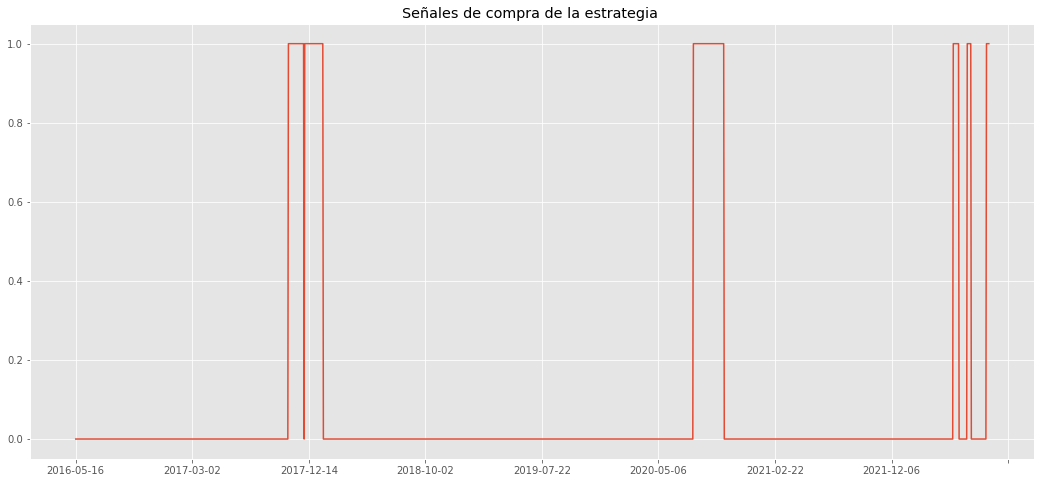

In [17]:
data['Senal'].plot(title = 'Señales de compra de la estrategia ' )
# Ploteando una parte
#data.loc['2010':'2022','Senal'].plot(title = 'Señales Regresión a la media ' +instrumento,xlim=('2010','2022'))

In [18]:
tiempo_final = time() 
 
tiempo_ejecucion = (tiempo_final - tiempo_inicial)/60
 
print ('El tiempo de ejecucion fue:',tiempo_ejecucion,"minutos") #En segundos

El tiempo de ejecucion fue: 20.738716816902162 minutos


In [19]:
data.loc['2011-01-04':'2019-11-04']

,Date,Senal,Price,Objetivo,ExitReason,Beneficio
2016-05-16,2016-05-16,0,82.139999,NaN,NaN,NaN
2016-05-17,2016-05-17,0,80.709999,NaN,NaN,NaN
2016-05-18,2016-05-18,0,81.709999,NaN,NaN,NaN
2016-05-19,2016-05-19,0,81.010002,NaN,NaN,NaN
2016-05-20,2016-05-20,0,84.699997,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-10-29,2019-10-29,0,197.889999,NaN,NaN,NaN
2019-10-30,2019-10-30,0,199.279999,NaN,NaN,NaN
2019-10-31,2019-10-31,0,195.479996,NaN,NaN,NaN
2019-11-01,2019-11-01,0,200.940002,NaN,NaN,NaN


In [20]:
#Guardamos el resultado del analisis en un pickle
#dff.to_pickle("./primerBack_IBE.pkl")

***3.- Ingeniería de datos para calcular la bondad de la estrategia***

In [21]:

data['Dif_Close'] = data.Price.pct_change()
data['Retornos'] = data.Dif_Close * data.Senal.shift(1)   
data['Capital'] = (data.Retornos + 1).cumprod() * 100
    
rg.StrategyClass.dfLog=data  #Ojo a esta liena, no me cuadra.

#quant_j.salvarExcel(StrategyClass.dfLog, "log"+instrumento)   
#data.to_pickle('almacen')    #df = pd.read_pickle(file_name)

>Para calcular los retornos del sistema, calculamos la diferencia relativativa entre el precio de cierre y el del día anterior. Para posteriormente multiplicarlo por la señal que del día anterior que nos indicaba la posición a tomar (si estaba comprado, sumo beneficio).

In [22]:
data.tail()

,Date,Senal,Price,Objetivo,ExitReason,Beneficio,Dif_Close,Retornos,Capital
2022-08-01,2022-08-01,1,273.829987,NaN,NaN,21.637584,-0.023466,-0.0,118.842604
2022-08-02,2022-08-02,1,273.859985,NaN,NaN,NaN,0.000110,0.00011,118.855623
2022-08-03,2022-08-03,1,275.029999,NaN,NaN,NaN,0.004272,0.004272,119.363411
2022-08-04,2022-08-04,1,274.850006,NaN,NaN,NaN,-0.000654,-0.000654,119.285294
2022-08-05,2022-08-05,1,288.029999,NaN,NaN,NaN,0.047953,0.047953,125.005429


In [23]:
data[60:]

,Date,Senal,Price,Objetivo,ExitReason,Beneficio,Dif_Close,Retornos,Capital
2016-08-10,2016-08-10,0,99.699997,NaN,NaN,NaN,-0.030439,-0.0,100.0
2016-08-11,2016-08-11,0,101.209999,NaN,NaN,NaN,0.015145,0.0,100.0
2016-08-12,2016-08-12,0,101.529999,NaN,NaN,NaN,0.003162,0.0,100.0
2016-08-15,2016-08-15,0,102.480003,NaN,NaN,NaN,0.009357,0.0,100.0
2016-08-16,2016-08-16,0,100.0,NaN,NaN,NaN,-0.024200,-0.0,100.0
...,...,...,...,...,...,...,...,...,...
2022-08-01,2022-08-01,1,273.829987,NaN,NaN,21.637584,-0.023466,-0.0,118.842604
2022-08-02,2022-08-02,1,273.859985,NaN,NaN,NaN,0.000110,0.00011,118.855623
2022-08-03,2022-08-03,1,275.029999,NaN,NaN,NaN,0.004272,0.004272,119.363411
2022-08-04,2022-08-04,1,274.850006,NaN,NaN,NaN,-0.000654,-0.000654,119.285294


>El capital, por comodidad, lo calcularemos en base 100, es decir como si iniciaramos la inversión con 100 unidades monetarias. Para su calculo arrastramos el producto acumulado de los retornos mas 1, multiplicados como dijimos por 100.

Pero para observar gráficamente la evolución del sistema necesitamos un gráfico con mas información. Para ello definimos una función que nos mostrará un gráfico con la evolución de nuestra estrategia, comparandola con la del activo. En un subgráfico se visualizará el drawdown del sistema, comparado de nuevo con el del activo. Y por útlimo las posiciones que toma el sistema.

In [24]:
def grafico (df):
    estudio = df.copy()
    
    DD_bh, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Dif_Close[60:], info = False) 
    
    DD, maxDD, maxDD_ini, maxDD_fin = analisis.DrawDown(estudio.Retornos.fillna(0), info = False) 

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(18, 12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    fig.suptitle('Estrategia vs B & H', fontsize=20)

    #Primer plot analiza la evolcuion de una inversion de 100€ en buy&hold y la estrategia)
    ax1.plot(estudio.Capital)
    ax1.plot((estudio.Price) * (100/estudio.Price[1]))
    ax1.set_title('Capital')
    ax1.legend(['Estrategia','Buy & Hold'])

    ax2.plot(DD*100, c='0.5')
    ax2.plot(DD_bh*100, c='y')
    ax2.fill_between(DD.index, 0, DD*100, color='0.7')
    ax2.set_title('Drawdown')
    ax2.legend(['Estrategia','Buy & Hold'])

    ax3.plot(estudio.Senal, c='orange')
    #ax3.fill_between(estudio.index, 0, estudio.Senal*100, color='orange')
    ax3.set_title('Posición')

    plt.show()
    return

In [25]:
print(instrumento)

vrtx


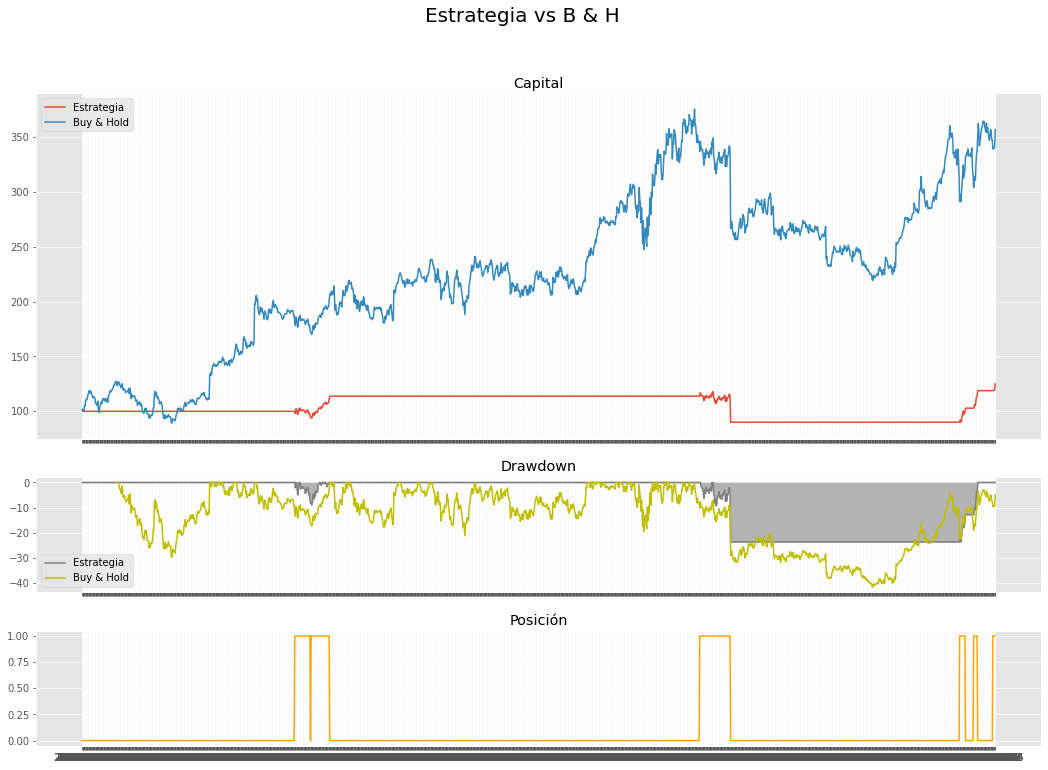

In [26]:
grafico(data)

---

In [27]:
#data[55:70]

---

# ANALISIS DEL SISTEMA

In [28]:
Beneficio_Bruto = data.Capital[-1] - data.Capital[1]
print ('Beneficio Bruto : {:.2f} €  con una inverison de 100€'.format(Beneficio_Bruto))

Beneficio Bruto : 25.01 €  con una inverison de 100€


In [29]:
#Rentabilidad anual compuesta. Calculamos lo que la inversion se ha incrementado cada año con el interes compuesto
CAGR = analisis.CAGR(data.Retornos)
print ('CAGR : {:.2f}%'.format(CAGR * 100))

CAGR : 3.65%


In [30]:
#Ratio calculado restando una rentabilidad segura a nuestra rentabilidad de estrategia y dividido por el riego (=volatilidad)
data.Retornos=data.Retornos.replace(0,np.e)  #Quito los cero (no sepuede hacer logariotmo de cero), pero no se que poner
Sharpe = CAGR / (np.log(data.Retornos + 1).std(skipna=True) * 252 ** 0.5)
print ('Sharpe : {:.3f}'.format(CAGR ))

Sharpe : 0.037


In [31]:
# Actualizo la excel con los economic
regreMedia.analisisEconomics(instrumento)

---


In [32]:
# 

### Cálculo esperanza matemática
 
 (%Aciertos * beneficioMedio )-(%Errores * perdidaMedia)
 Nos da idea el benefcio esperado por entrada

In [33]:
print("Numero operaciones con beneficio ->", 
      data[data['ExitReason'] ==1]['ExitReason'].count()) 
print("Numero operaciones con perdidas ->", 
      data[data['ExitReason'] ==-1]['ExitReason'].count()) 
  
data[data['ExitReason']>0]['ExitReason'] 

data[data['Senal']>0][1:10]
data[data['Senal']>0].index[1]

Numero operaciones con beneficio -> 3
Numero operaciones con perdidas -> 2


'2017-10-26'

In [34]:
# ENTRADAS
print (data[(data['Senal']>0) & (data['Beneficio']>0)].index[0])
data[(data['Senal']>0) & (data['Beneficio']>0) ][0:5] 
# SALIDA PERDIDAS
print (data[(data['Senal'].shift(1) >0) & (data['ExitReason']== -1)].index[0])
data[(data['Senal'].shift(1) >0) & (data['ExitReason']== -1)][0:5]
# SALIDA GANANCIAS
data[(data['Senal'].shift(1) >0) & (data['ExitReason']== 1)][0:5]

2017-10-25
2017-12-04


,Date,Senal,Price,Objetivo,ExitReason,Beneficio,Dif_Close,Retornos,Capital
2018-01-23,2018-01-23,0,166.580002,NaN,1,NaN,0.028843,0.028843,113.826766
2022-05-23,2022-05-23,0,268.350006,NaN,1,NaN,0.037743,0.037743,102.866972
2022-06-23,2022-06-23,0,283.5,NaN,1,NaN,0.041093,0.041093,118.842604


In [35]:
serieIndicesENTRADA=data[(data['Senal']>0) & (data['Beneficio']>0)].index

print(serieIndicesENTRADA.size)

serieIndicesENTRADA

serieIndicesEXIT=data[(data['ExitReason']==1) | (data['ExitReason']==-1)].index

print(serieIndicesEXIT.size)

#data['ExitReason'][serieIndicesEXIT[2]]

6
5


In [36]:
serieIndicesENTRADA

Index(['2017-10-25', '2017-12-05', '2020-07-31', '2022-05-09', '2022-06-13',
       '2022-08-01'],
      dtype='object')

In [37]:
#Cálculo Esperanza Matemática
countGanando=0
countPerdiendo=0

bolsaGanando=0
bolsaPerdiendo=0

for i in range(serieIndicesEXIT.size):
    if(data['ExitReason'][serieIndicesEXIT[i]] == -1):
        ref1  = data['Price'][serieIndicesEXIT[i]]
        ref2 = data['Price'][serieIndicesENTRADA[i]]
        print ("-1",ref1, ref2)
        countPerdiendo= 1+countPerdiendo
        bolsaPerdiendo= bolsaPerdiendo + (ref1-ref2)

    
    if(data['ExitReason'][serieIndicesEXIT[i]] == 1):
        ref1  = data['Price'][serieIndicesEXIT[i]]
        ref2 = data['Price'][serieIndicesENTRADA[i]]
        print ("+1",ref1, ref2)
        countGanando= 1+countGanando
        bolsaGanando= bolsaGanando + (ref1-ref2)
    
#(%Aciertos * beneficioMedio )-(%Errores * perdidaMedia)

count=countGanando+countPerdiendo


print ("bolsa ganando   --> ", bolsaGanando, "   numero operaciones ganando   ", countGanando)   
print ("bolsa perdiendo -->", bolsaPerdiendo, "   numero operaciones perdiendo", countPerdiendo) 
print ("media perdiendo --> ", (bolsaPerdiendo/countPerdiendo), "  media ganando", (bolsaGanando/countGanando)) 


esperanza = (countGanando/count *(bolsaGanando/countGanando))+(countPerdiendo/count *(bolsaPerdiendo/countPerdiendo))
print("")
print(instrumento)
print("ESPERANZA MATEMATICA ES: ", esperanza)



-1 138.7899932861328 146.8000030517578
+1 166.5800018310547 138.36000061035156
-1 215.27999877929688 272.0
+1 268.3500061035156 235.02000427246094
+1 283.5 245.38999938964844
bolsa ganando   -->  99.66000366210938    numero operaciones ganando    3
bolsa perdiendo --> -64.73001098632812    numero operaciones perdiendo 2
media perdiendo -->  -32.36500549316406   media ganando 33.220001220703125

vrtx
ESPERANZA MATEMATICA ES:  6.985998535156247


---